In [5]:
import pandas as pd

In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

# Pandas Profiling 

In [ ]:
import numpy as np
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title='profile Report')
profile.to_file(output_file='output.html')

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
import numpy as np
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)


# find the percentage of null values
df['cabin_null'].mean()

In [ ]:
df.columns

In [ ]:
df.groupby(['Survived'])['cabin_null'].mean()

### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation


## Mean/ MEdian /Mode imputation

### When should we apply? Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables


In [25]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [26]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [27]:
# checking mean or median fits on it
def impute_median_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
def impute_mean_nan(df,variable,mean):
    df[variable+"_mean"]=df[variable].fillna(mean)

In [28]:
median=df.Age.median()
mean = df.Age.mean()

In [29]:
median, mean


(28.0, 29.69911764705882)

In [30]:
median_age = impute_median_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [31]:
impute_mean_nan(df,'Age',mean)
df.head()

,Survived,Age,Fare,Age_median,Age_mean
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [32]:
# checking variance 
print('original Age variable variance:',df['Age'].var())
print('Age variable variance after median:',df['Age_median'].var())
print('Age variable variance after mean:',df['Age_mean'].var())




original Age variable variance: 211.01912474630802
Age variable variance after median: 169.51249827942345
Age variable variance after mean: 169.0523999372108


In [33]:
# Checking standard deviation
print('original Age variable variance:',df['Age'].std())
print('Age variable variance after median:',df['Age_median'].std())
print('Age variable variance after mean:',df['Age_mean'].std())

original Age variable variance: 14.526497332334042
Age variable variance after median: 13.019696550973201
Age variable variance after mean: 13.002015226002882


In [34]:
# check the distribution
import matplotlib.pyplot as plt
%matplotlib inline

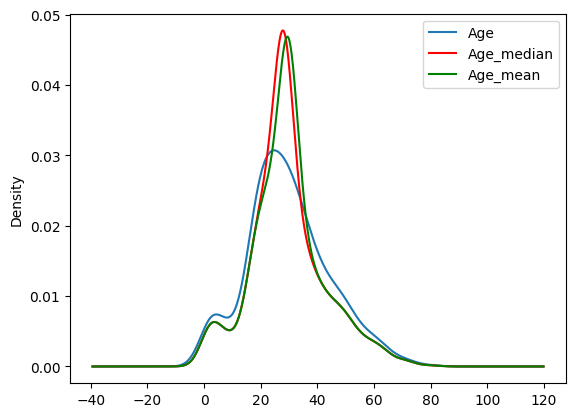

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_mean.plot(kind='kde',ax=ax,color='green')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [36]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_mean        0
dtype: int64

# Random Sample Imputation

#### Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.
#### When should it be used? It assumes that the data are missing completely at random(MCAR)

In [46]:
df['Age'].isnull().sum()

177

In [47]:
# For filling the random values in Age missing data
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [48]:
df[df['Age'].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [57]:
# checking mean or median   or random values which will fit on it fits on it
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_mean"]=df[variable].fillna(mean)
#     for random value
    df[variable+"_random"]=df[variable]
#     it will have random sample to fill na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    #pandas need to have same index in order to merge the datasets
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [58]:
median = df.Age.median()
mean = df.Age.mean()


median

In [59]:
median,mean


(28.0, 29.69911764705882)

In [60]:
impute_nan(df,"Age",median)

In [61]:
df.head()

,Survived,Age,Fare,Age_median,Age_mean,Age_random
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0


In [62]:
df.tail()

,Survived,Age,Fare,Age_median,Age_mean,Age_random
886,0,27.0,13.00,27.0,27.000000,27.0
887,1,19.0,30.00,19.0,19.000000,19.0
888,0,NaN,23.45,28.0,29.699118,15.0
889,1,26.0,30.00,26.0,26.000000,26.0
890,0,32.0,7.75,32.0,32.000000,32.0


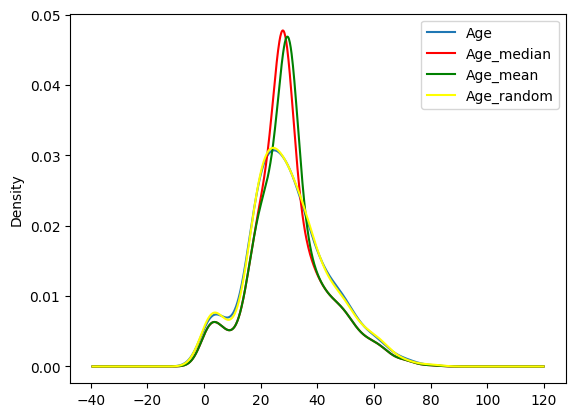

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df.Age_median.plot(kind='kde',ax=ax,color='red')
df.Age_mean.plot(kind='kde',ax=ax,color='green')
df.Age_random.plot(kind='kde',ax=ax,color='yellow')
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

# Advantages
1. Easy to implement
2. There is less distortion in variance
3. used mostly when linear alogorithm is used 

# Disadvantages
1. Every situation randomness wont work
2. Not good for Decision trees
3. Memory heavy issues due to storing of all the data in server while deploying it.

# Capturing NAN values with a new feature
##### it works well if the data are not missing completely at random.

In [75]:
df = pd.read_csv('titanic.csv',usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [76]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)

In [77]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [78]:
df.Age.median()

28.0

In [79]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [80]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# Advantages
1. Easy to implement
2. Captures the importance of missing values

# Disadvantages
1. creating Additional Features (Curse of Dimensionally)

# End of Distribution Imputation
it is used when the data is not missing at random (NMAR). and follows the normal distribution and takes the last values of it.and use mainly boxplot techniques to evaluate it.

In [95]:
df = pd.read_csv('titanic.csv',usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

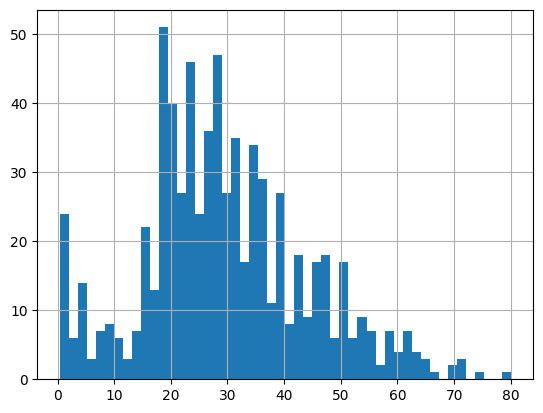

In [96]:
df.Age.hist(bins=50)

#### on the above chart we need the lasy values which lies between 70 and 80 to fill the na values with that.

In [97]:
extreme = df.Age.mean()+3*df.Age.std()

In [98]:
extreme

73.27860964406094

<Axes: xlabel='Age'>

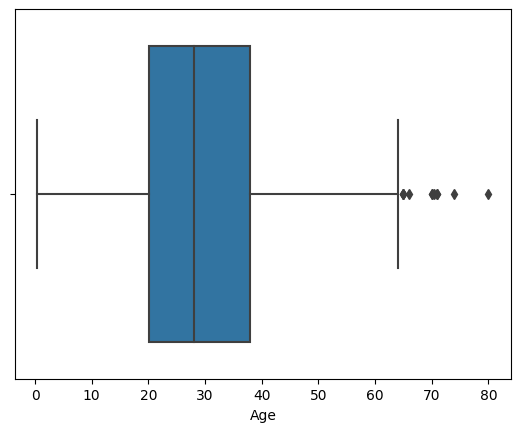

In [102]:
import seaborn as sns
sns.boxplot(data=df, x='Age')


In [105]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median,inplace=True)

In [106]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [108]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<Axes: >

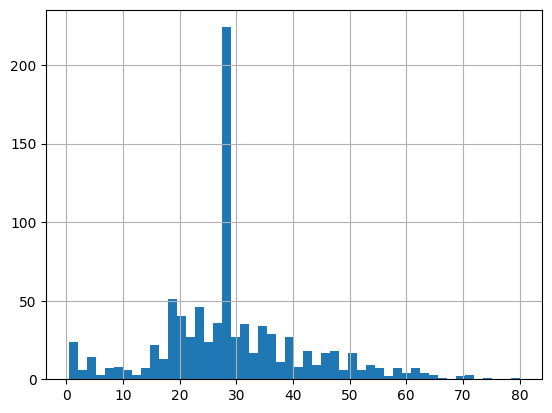

In [109]:
df['Age'].hist(bins=50)

<Axes: >

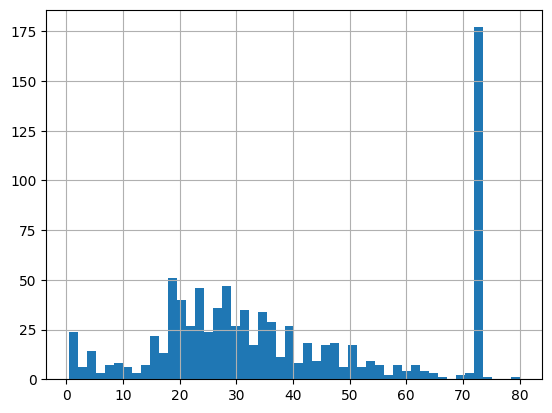

In [110]:
df['Age_end_distribution'].hist(bins=50)


<Axes: >

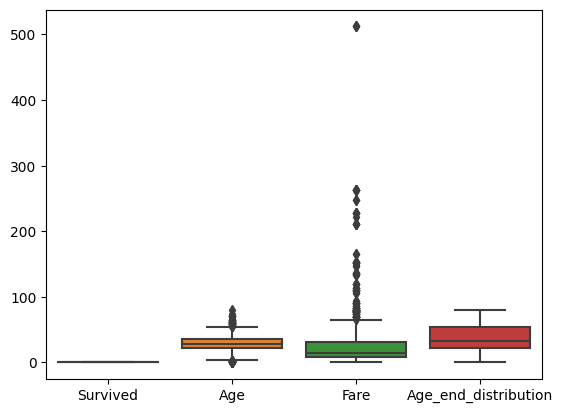

In [114]:
sns.boxplot(data=df)

In [6]:

df = pd.read_csv('titanic.csv')

In [7]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### It is clear that 77% of the ‘Cabin’ Column is missing, which is a very significant percentage. Age has around 19% of data missing and Embarked has only 0.2% missing.

In [8]:
# The Embarked data has only 2% missing values so , dropping it.
df.dropna(subset=['Embarked'],how='any',inplace=True)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.isnull()['Embarked'].sum()

0

In [15]:
# visulaize the missing values with missingo
import missingno as msno

<Axes: >

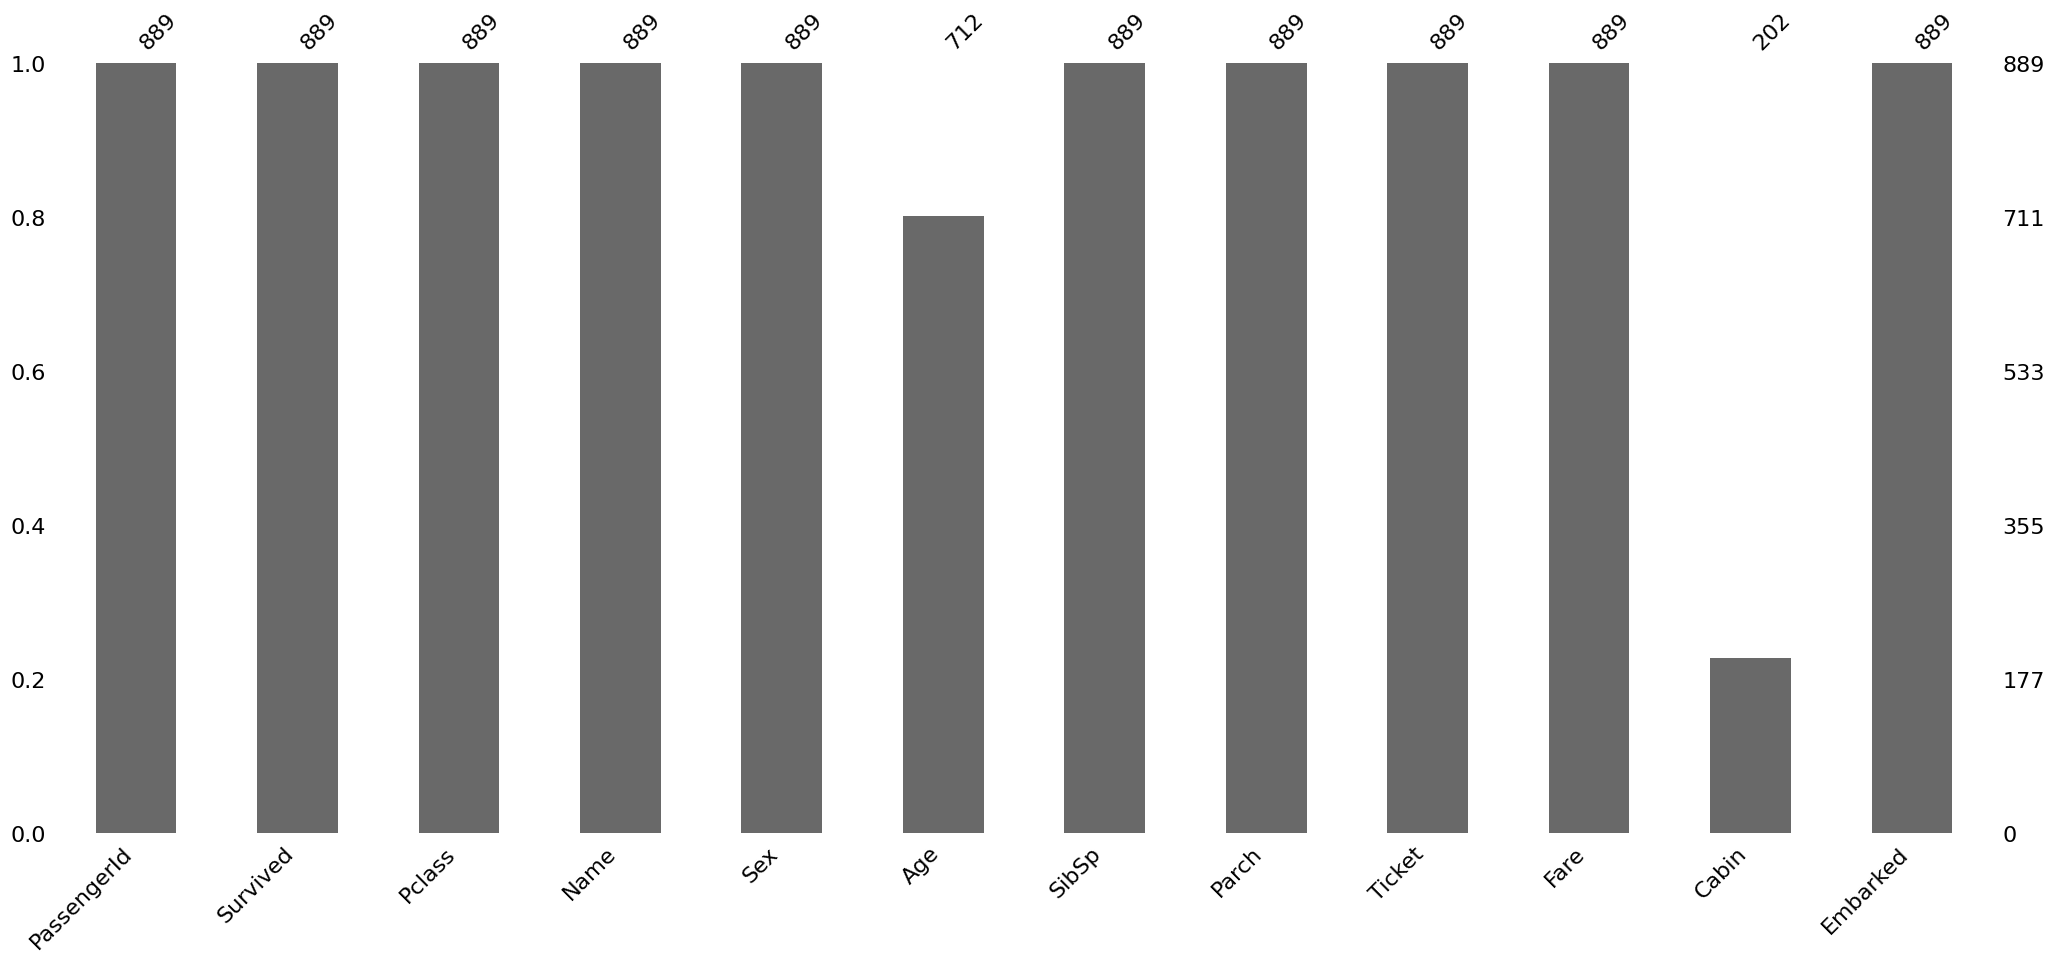

In [17]:
msno.bar(df)

<Axes: >

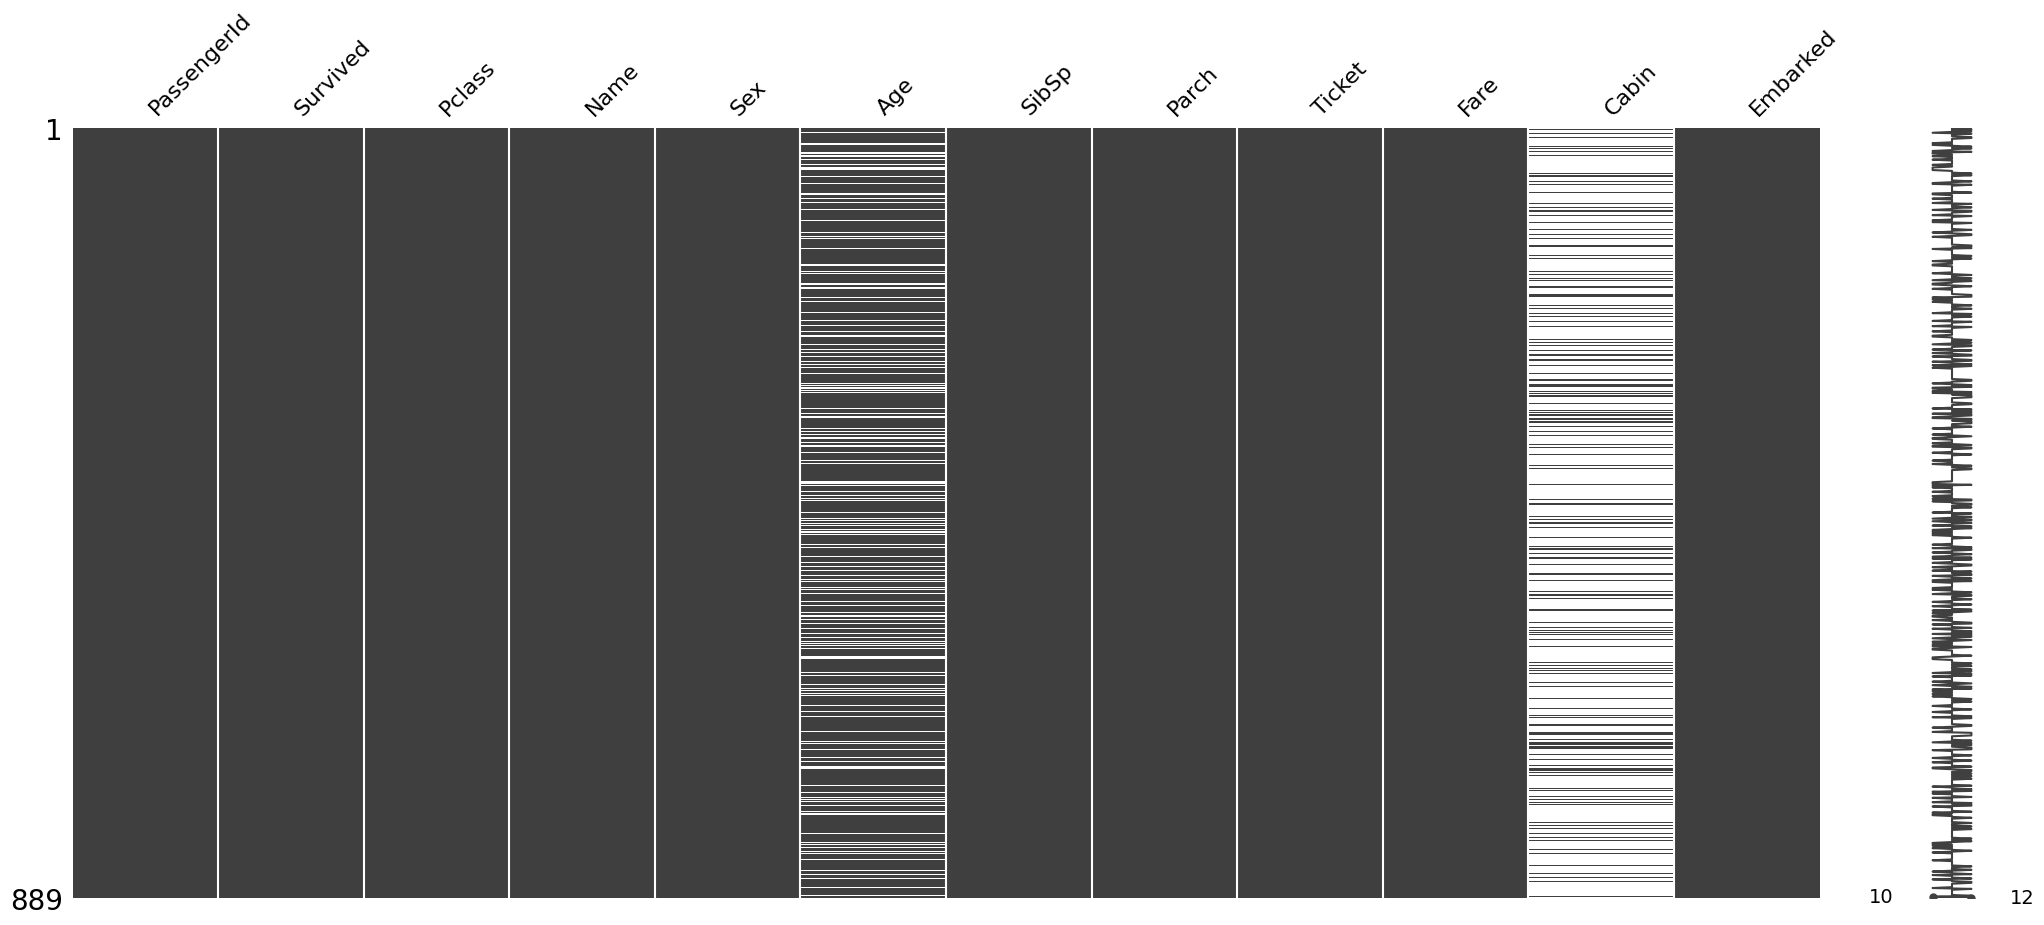

In [18]:
msno.matrix(df)

<Axes: >

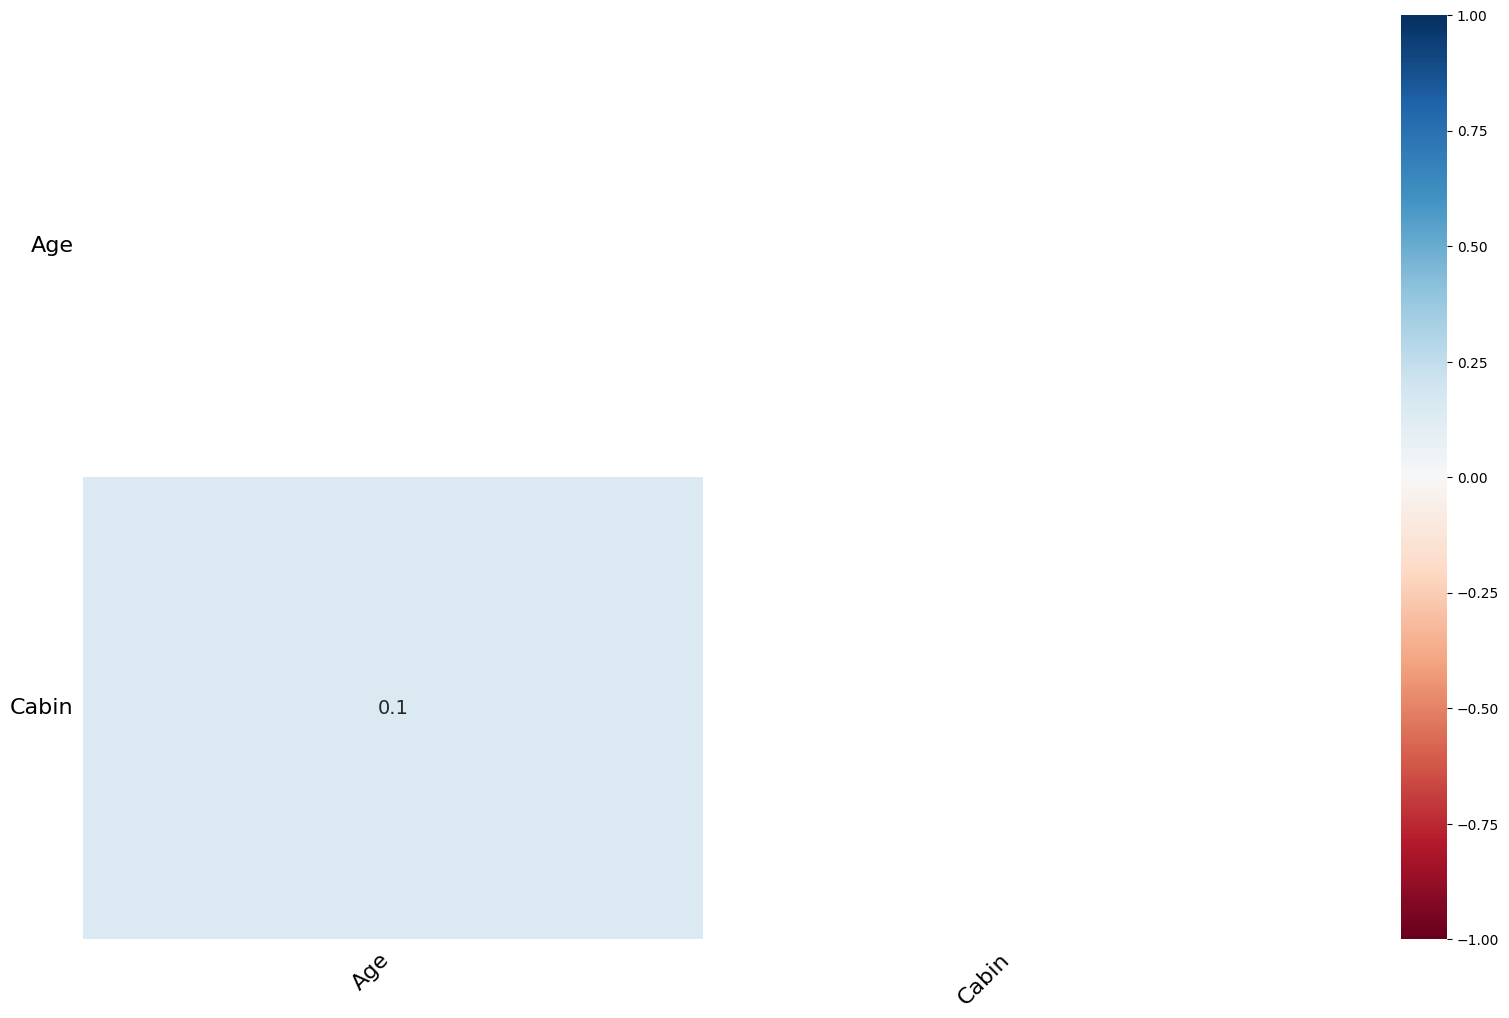

In [19]:
msno.heatmap(df)

In [20]:
df.isnull()['Cabin'].sum()

687

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


# Arbitrary Value Imputation
This technique was derived from kaggle competition . It consists of replacing NAN by an arbitrary value. used mostly categorical variable. on this the value is fill with -1 or 99 or anynumber.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("titanic.csv", usecols=["Age", "Fare", "Survived"])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
def impute_nan(df,variable):
    df[variable+'_zero']= df[variable].fillna(0)
    df[variable+'_hundered'] = df[variable].fillna(100)

In [6]:
df['Age'].isnull().sum()

177

<Axes: >

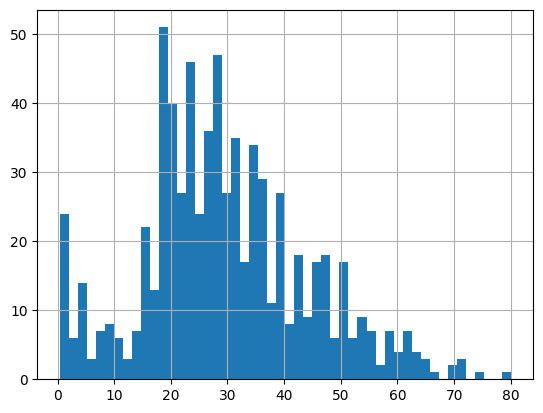

In [7]:
df['Age'].hist(bins=50)

# Advantages
1. Easy to implement
2. Captures the importance of missingness if there is one
3. It is used when the data is not missing at random.

# Disadvantages
1. Distorts the original distribution of the variable
2. If missingness is not important , it may mask the predictive power of the original variables by distorting its distribution
3. Hard to decide which value to use.